In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../../dataset/train_val_test_preprocessed.csv"
data = pd.read_csv(file_path)

data.head()

,sentiment,content
0,sadness,im feeling rather rotten im ambitious right
1,sadness,im updating blog feel shitty
2,sadness,never make separate ever want feel like ashamed
3,joy,left bouquet red yellow tulip arm feeling slig...
4,sadness,feeling little vain one


In [3]:
data.sentiment.value_counts()

joy         6743
sadness     5794
anger       2704
fear        2366
love        1628
surprise     713
Name: sentiment, dtype: int64

In [4]:
data = data.dropna(subset=['content'])

In [5]:
X = data['content'].astype(str)
y = data['sentiment']

vec = TfidfVectorizer()
X = vec.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [7]:
rfc = RandomForestClassifier(random_state=42 )

In [8]:
rfc.fit(X_train, y_train)
rf_pred = rfc.predict(X_test)

In [9]:
print(classification_report(y_test, rf_pred, zero_division='warn'))
confusion_m = confusion_matrix(y_test, rf_pred)

              precision    recall  f1-score   support

       anger       0.88      0.88      0.88       523
        fear       0.87      0.88      0.88       511
         joy       0.89      0.94      0.91      1365
        love       0.87      0.74      0.80       317
     sadness       0.93      0.92      0.93      1151
    surprise       0.86      0.78      0.82       123

    accuracy                           0.90      3990
   macro avg       0.89      0.86      0.87      3990
weighted avg       0.90      0.90      0.90      3990



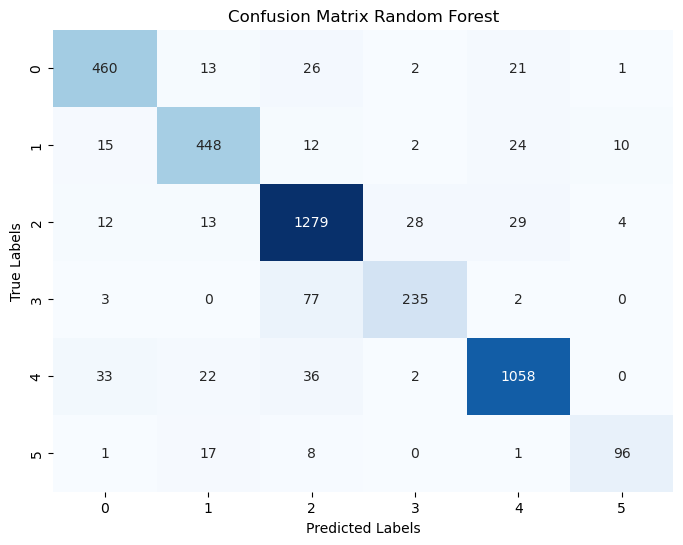

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [11]:
accuracy = accuracy_score(y_test, rf_pred) # accuracy
precision = precision_score(y_test, rf_pred, average='weighted') # precision 
recall = recall_score(y_test, rf_pred, average='weighted') # recall
f1 = f1_score(y_test, rf_pred, average='weighted') # f1

print("Name: ", "RF")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Name:  RF
Accuracy:  0.8962406015037594
Precision:  0.8961586910515984
Recall:  0.8962406015037594
F1:  0.8954770123580252
